# Распределение тем размеров по семантическим доменам

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
from collections import Counter, defaultdict
import re
import csv
from google.colab import files
import os
import pandas as pd
import seaborn as sns

Определяем списки слов, формирующие один домен

In [ ]:
domains = {
    'Человек': 'душа, красота, кровь, память, сердце, сила',
    'Тело': 'взгляд, глаз, голова, голос, грудь, губа, крыло, лицо, нога, плечо, рука, тело, тень, улыбка',
    'Эмоция': 'беда, боль, желание, кровь, любовь, мечта, надежда, радость, сердце, слеза, страсть, улыбка, чувство, чудо',
    'Сознание': 'вера, мысль, память',
    'Экзистенция': 'бог, вера, время, дорога, жизнь, конец, край, красота, мир, память, покой, правда, путь, сила, смерть, смысл, судьба',
    'Речь': 'вопрос, голос, ответ, песня, сказка, слово, тишина',
    'Персонаж': 'друг, женщина, мама, ребенок, человек',
    'Событие': 'беда, встреча, любовь, прошлое, смерть, сон, шаг',
    'Время': 'век, вечер, время, год, день, мгновение, миг, ночь, пора, прошлое, раз, утро, час',
    'Природа': 'весна, ветер, вода, волна, гора, дождь, звезда, земля, крыло, лист, море, небо, огонь, осень, птица, река, свет, снег, солнце, тень, тишина',
    'География': 'город, дорога, земля, край',
    'Дом': 'дверь, дом, окно, стена',
    'Социум': 'дело, народ, слава, труд'
}

sem_domains = {}
for k, v in domains.items():
  sem_domains.update({k: v.split(', ')})

print(sem_domains)


{'Человек': ['душа', 'красота', 'кровь', 'память', 'сердце', 'сила'], 'Тело': ['взгляд', 'глаз', 'голова', 'голос', 'грудь', 'губа', 'крыло', 'лицо', 'нога', 'плечо', 'рука', 'тело', 'тень', 'улыбка'], 'Эмоция': ['беда', 'боль', 'желание', 'кровь', 'любовь', 'мечта', 'надежда', 'радость', 'сердце', 'слеза', 'страсть', 'улыбка', 'чувство', 'чудо'], 'Сознание': ['вера', 'мысль', 'память'], 'Экзистенция': ['бог', 'вера', 'время', 'дорога', 'жизнь', 'конец', 'край', 'красота', 'мир', 'память', 'покой', 'правда', 'путь', 'сила', 'смерть', 'смысл', 'судьба'], 'Речь': ['вопрос', 'голос', 'ответ', 'песня', 'сказка', 'слово', 'тишина'], 'Персонаж': ['друг', 'женщина', 'мама', 'ребенок', 'человек'], 'Событие': ['беда', 'встреча', 'любовь', 'прошлое', 'смерть', 'сон', 'шаг'], 'Время': ['век', 'вечер', 'время', 'год', 'день', 'мгновение', 'миг', 'ночь', 'пора', 'прошлое', 'раз', 'утро', 'час'], 'Природа': ['весна', 'ветер', 'вода', 'волна', 'гора', 'дождь', 'звезда', 'земля', 'крыло', 'лист', 'мор

In [ ]:
os.mkdir('/content/corpus')
os.chdir('/content/corpus')

## Граф

In [ ]:
uploaded = files.upload()

Saving 10_topics - strict_max_min.csv to 10_topics - strict_max_min.csv


Определяем функцию, возвращающую ближайших к теме семантический домен

In [ ]:
# function that only returns the domain with the most matching words

def closest_domains(topic):
  closest_domain = ""
  max_count = 0
  for k, v in sem_domains.items():
    counter = 0
    for i in v:
      if i in topic:
        counter += 1
    if counter > max_count:
      max_count = counter
      closest_domain = k
  return closest_domain


Создаем словарь, ключами которого являются названия размеров, а значениями - списки тем, каждый из которых - список слов, формирующий эту тему

In [ ]:
files = os.listdir()
dict_topics = {}
for f in files:
    with open(f) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        reader = list(reader)
        for row in range(len(reader)):
          if reader[row][0]:
            top = re.search('topic', reader[row][0])
            if top:
              for t in range(10):
                topic = []
                for w in range(1, 11):
                    topic.append(reader[row+w][t])
                dict_topics[meter_name].append(topic)
            elif not reader[row][1]:
              meter_name = reader[row][0]
              dict_topics.update({meter_name: []})

Создаем словарь, в котором будет храниться информация о том, каким доменам соответсвуют темы размеров

In [ ]:
domain_dict = {}

for k, v in dict_topics.items():
  domain_dict.update({k: []})
  for topic in v:
    domains = closest_domains(topic)
    domain_dict[k].append(domains)

domain_dict  

Создаем словарь, на основе которого будет строиться граф

In [ ]:
graph_dict = {}

for i in domain_dict.keys():
  graph_dict.update({i: {}})
  for l in domain_dict[i]:
    if l:
      check = graph_dict[i].get(l)
      if check:
        graph_dict[i][l] += 1
      else:
        graph_dict[i].update({l: 1})

graph_dict

Создаем словарь, с помощью которого ребра графа будут окрашены в соответствии с метром, с которым они смежны

In [ ]:
color_map = {
    'Д3': 'g',
    'Д4': 'g',
    'Д5': 'g',
    'Я2': 'b',
    'Я3': 'b',
    'Я4': 'b',
    'Я5': 'b',
    'Я6': 'b',
    'Я7': 'b',
    'Я8': 'b',
    'Ан2': 'y',
    'Ан3': 'y',
    'Ан4': 'y',
    'Ан5': 'y',
    'Ам2': 'r',
    'Ам3': 'r',
    'Ам4': 'r',
    'Ам5': 'r',
    'Х3': 'm',
    'Х4': 'm',
    'Х5': 'm',
    'Х6': 'm',
    'Х8': 'm'
}

Создаем датафрейм, который будет хранить информацию о категории вершины - метр или домен, чтобы такие вершины были раскрашены по-разному

In [ ]:
nodes = list(color_map.keys()) + list(sem_domains.keys())
types = ['meter' for x in list(color_map.keys())] + ['domain' for y in list(sem_domains.keys())]
carac = pd.DataFrame({
    'ID': nodes, 
    'type': types
                      })
carac.sample(5)

,ID,type
11,Ан3,meter
4,Я3,meter
35,Социум,domain
14,Ам2,meter
8,Я7,meter


In [ ]:
carac = carac.set_index('ID')
carac = carac.reindex(G.nodes())
carac['type'] = pd.Categorical(carac['type'])
carac['type'].cat.codes
cmap = matplotlib.colors.ListedColormap(['C0', 'darkorange'])

Строим граф

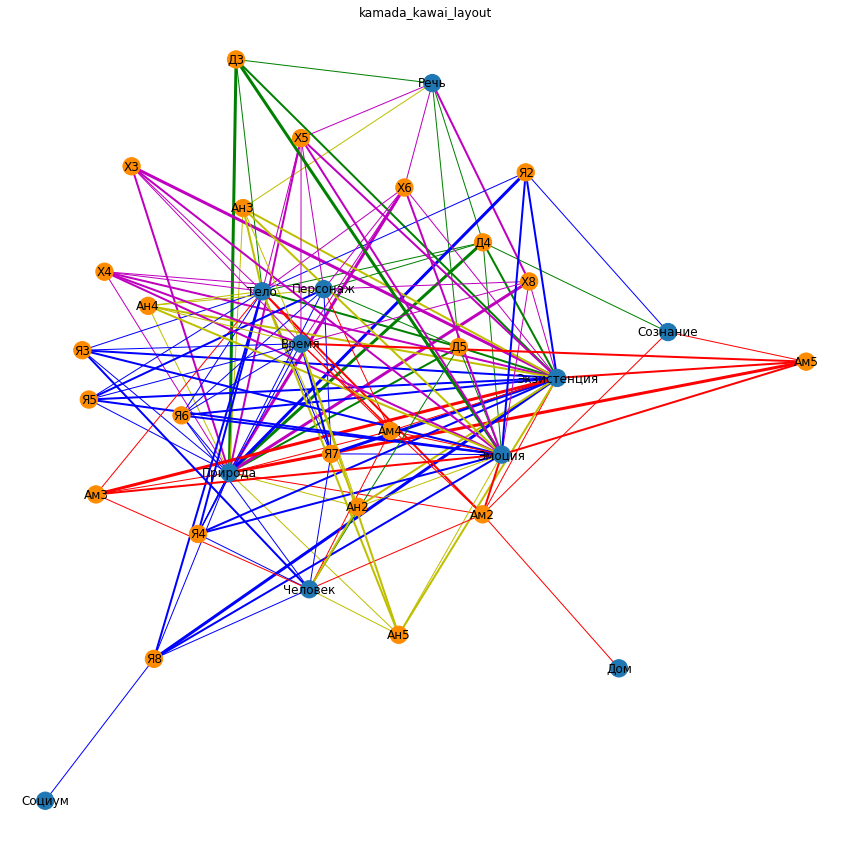

In [ ]:
G = nx.Graph()

plt.figure(figsize=(15, 15))
ax = plt.gca()
ax.set_title('kamada_kawai_layout')

for k1 in graph_dict.keys():
  for k2 in graph_dict[k1].keys():
    w = graph_dict[k1][k2]
    G.add_edge(k1, k2, weight=w, edge_color=color_map[k1])

edges = G.edges()
colors = [G[u][v]['edge_color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

# pos = nx.shell_layout(G)
pos = nx.kamada_kawai_layout(G)


nx.draw(G, pos, with_labels=True, edge_color=colors, width=weights, node_color=carac['type'].cat.codes, cmap=cmap)

# Тепловая карта

In [ ]:
uploaded = files.upload()

Saving sem_domains.csv to sem_domains.csv


Записываем информацию из имеющегося словаря в csv-файл

In [ ]:
with open('sem_domains.csv', 'a', newline='') as csvfile:
  writer = csv.writer(csvfile, delimiter=',')
  doms = [' '] + list(sem_domains.keys())
  writer.writerow(doms)

for i in graph_dict.keys():
    with open('sem_domains.csv', 'a', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        out = [i]
        for k in sem_domains:
          check = graph_dict[i].get(k)
          if check:
            out.append(graph_dict[i][k])
          else:
            out.append(0)
        writer.writerow(out)


Создаем датафрейм из csv-файла и избавляемся от лишних строк

In [ ]:
df = pd.read_csv('sem_domains.csv')
df.head(5)

,,Человек,Тело,Эмоция,Сознание,Экзистенция,Речь,Персонаж,Событие,Время,Природа,География,Дом,Социум
0,,Человек,Тело,Эмоция,Сознание,Экзистенция,Речь,Персонаж,Событие,Время,Природа,География,Дом,Социум
1,,Человек,Тело,Эмоция,Сознание,Экзистенция,Речь,Персонаж,Событие,Время,Природа,География,Дом,Социум
2,Д4,0,1,1,1,2,1,1,0,0,3,0,0,0
3,Д5,1,2,1,0,2,1,1,0,0,2,0,0,0
4,Д3,0,1,3,0,2,1,0,0,0,3,0,0,0


In [ ]:
df = df.drop(labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], axis=0)
df.head(5)

,,Человек,Тело,Эмоция,Сознание,Экзистенция,Речь,Персонаж,Событие,Время,Природа,География,Дом,Социум
26,Д4,0,1,1,1,2,1,1,0,0,3,0,0,0
27,Д5,1,2,1,0,2,1,1,0,0,2,0,0,0
28,Д3,0,1,3,0,2,1,0,0,0,3,0,0,0
29,Х4,0,1,2,0,2,0,1,0,2,1,0,0,0
30,Х6,0,1,2,0,1,1,1,0,1,3,0,0,0


In [ ]:
meters = list(df[' '])

In [ ]:
# для сортировки по метрам:
meters = ['Ямб 2', 'Ямб 3', 'Ямб 4', 'Ямб 5', 'Ямб 6', 'Ямб 7', 'Ямб 8',
          'хорей 3', 'хорей 4', 'хорей 5', 'хорей 6', 'хорей 8',
          'Дактиль 3', 'Дактиль 4', 'Дактиль 5',
          'амфибрахий 2', 'амфибрахий 3', 'амфибрахий 4', 'амфибрахий 5',
          'Анапест 2', 'Анапест 3', 'Анапест 4', 'Анапест 5']

# для сортировки по стопам:
meters = ['Ямб 2', 'амфибрахий 2', 'Анапест 2',
          'Ямб 3', 'хорей 3', 'амфибрахий 3', 'Дактиль 3', 'Анапест 3',
          'Ямб 4', 'хорей 4', 'амфибрахий 4', 'Дактиль 4', 'Анапест 4', 
          'Ямб 5', 'хорей 5', 'амфибрахий 5', 'Дактиль 5', 'Анапест 5',
          'Ямб 6', 'хорей 6', 
          'Ямб 7',
          'Ямб 8', 'хорей 8']

# для сортировки по частотности:
meters = 'Я4 Я5 Х4 Ан3 Х5 Ам4 Ан4 Я3 Ам3 Д4 Я6 Ан2 Ан5 Х6 Х3 Д3 Ам5 Х8 Д5 Я7 Ам2 Я2 Я8'
meters = meters.split(' ')

sorted_met_names = [re.sub('Ямб ', 'Я', x) for x in meters]
sorted_met_names = [re.sub('хорей ', 'Х', x) for x in sorted_met_names]
sorted_met_names = [re.sub('Анапест ', 'Ан', x) for x in sorted_met_names]
sorted_met_names = [re.sub('амфибрахий ', 'Ам', x) for x in sorted_met_names]
sorted_met_names = [re.sub('Дактиль ', 'Д', x) for x in sorted_met_names]



In [ ]:
df_new = df.set_index([' '])

In [ ]:
df_new = df_new.reindex(meters)

In [ ]:
df_new

,Человек,Тело,Эмоция,Сознание,Экзистенция,Речь,Персонаж,Событие,Время,Природа,География,Дом,Социум
,,,,,,,,,,,,,
Я4,1,2,2,0,2,0,1,0,1,1,0,0,0
Я5,0,1,2,0,2,0,2,0,1,1,0,0,0
Х4,0,1,2,0,2,0,1,0,2,1,0,0,0
Ан3,0,2,2,0,2,1,0,0,1,1,0,0,0
Х5,0,1,2,0,2,1,1,0,1,2,0,0,0
Ам4,1,1,1,0,1,0,1,0,1,1,0,0,0
Ан4,0,1,2,0,2,0,1,0,1,1,0,0,0
Я3,2,1,2,0,2,0,0,0,1,1,0,0,0
Ам3,1,1,2,0,3,0,0,0,0,1,0,0,0


In [ ]:
df_out = df_new.astype(int)
df_out.head(5)

,Человек,Тело,Эмоция,Сознание,Экзистенция,Речь,Персонаж,Событие,Время,Природа,География,Дом,Социум
,,,,,,,,,,,,,
Я4,1,2,2,0,2,0,1,0,1,1,0,0,0
Я5,0,1,2,0,2,0,2,0,1,1,0,0,0
Х4,0,1,2,0,2,0,1,0,2,1,0,0,0
Ан3,0,2,2,0,2,1,0,0,1,1,0,0,0
Х5,0,1,2,0,2,1,1,0,1,2,0,0,0


Создаем тепловую карту

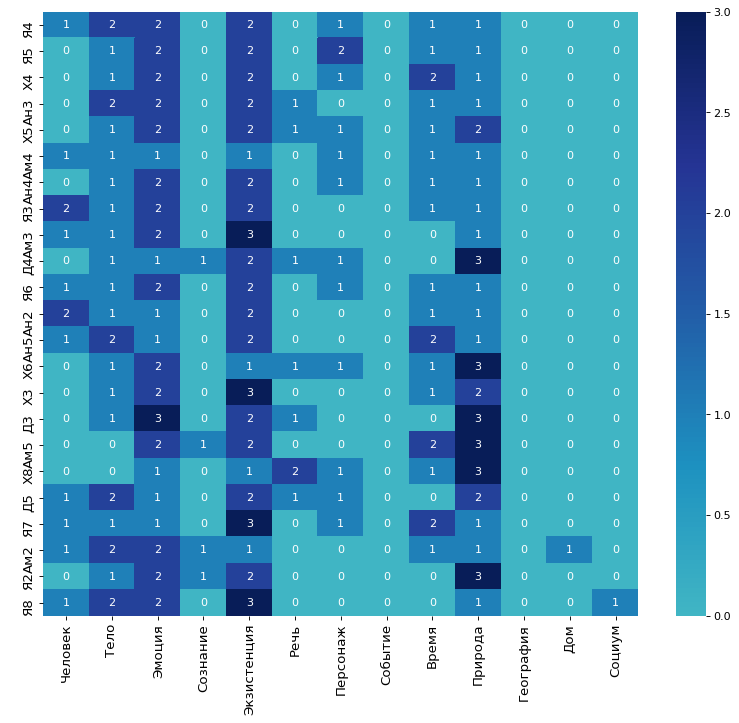

In [ ]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_out, xticklabels=df_out.columns, yticklabels=meters, cmap='YlGnBu', center=0, annot=True)

# Decorations
# plt.title('number of topics matching a semantic domain', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()